In [1]:
"""
Feature Scaling and Standardization 
This notebook prepares core clustering variables by applying different scaling methods and evaluating their impact.
Author: Hajar Cherrouk

"""

import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer)
from scipy import stats

# set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# load processed data
df = pd.read_csv("../../data/processed/nhanes_metabolic_analysis_ready.csv")
# core clustering variables
core_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST']

print("feature scaling and standarization")
print(f"\nDataset: {df.shape[0]:,} participants")
print(f"Core variables: {core_vars}")
print("\n Setup complete")

feature scaling and standarization

Dataset: 3,047 participants
Core variables: ['LBXGLU', 'LBXTLG', 'BMXWAIST']

 Setup complete


In [2]:
# show why scaling is necessary
print("\n original variable scales (before scaling)" )
scale_comparison = pd.DataFrame({'Variable': core_vars,'Mean': [df[var].mean() for var in core_vars],'Std': [df[var].std() for var in core_vars],
    'Min': [df[var].min() for var in core_vars], 'Max': [df[var].max() for var in core_vars],
    'Range': [df[var].max() - df[var].min() for var in core_vars]})

print("\n" + scale_comparison.round(2).to_string(index=False))

print("\n variane ratios (relative contribution to distanc calculations):")
variances = [df[var].var() for var in core_vars]
total_var = sum(variances)

for var, variance in zip(core_vars, variances):
    pct = (variance / total_var) * 100
    print(f"  {var:12s}: {variance:>10.2f} ({pct:>5.1f}% of total variance)")



 original variable scales (before scaling)

Variable   Mean   Std  Min    Max  Range
  LBXGLU 108.97 33.29 59.0  561.0  502.0
  LBXTLG 120.05 87.54 25.0 1745.0 1720.0
BMXWAIST 100.41 16.80 60.0  177.2  117.2

 variane ratios (relative contribution to distanc calculations):
  LBXGLU      :    1107.89 ( 12.2% of total variance)
  LBXTLG      :    7663.67 ( 84.6% of total variance)
  BMXWAIST    :     282.11 (  3.1% of total variance)


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
import pandas as pd

# prepare data matrix
X = df[core_vars].values
X_df = df[core_vars].copy()

# M1: StandardScaler (Z score normalization)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard, columns=[f'{var}_standard' for var in core_vars], index=df.index)

# M2: MinMaxScaler (0-1 normalization)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax, columns=[f'{var}_minmax' for var in core_vars], index=df.index)

# M3: RobustScaler (median and IQR)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)
X_robust_df = pd.DataFrame(X_robust, columns=[f'{var}_robust' for var in core_vars], index=df.index)

# M4: PowerTransformer 
scaler_power = PowerTransformer(method='yeo-johnson', standardize=True)
X_power = scaler_power.fit_transform(X)
X_power_df = pd.DataFrame(X_power, columns=[f'{var}_power' for var in core_vars], index=df.index)

# Summary prints
print("\nScaling methods applied:")

print("\n1. StandardScaler (Z score)")
print("   - Centers at mean=0, scales to std=1")
print("   - Sensitive to outliers")
print("   - Assumes approximately normal distribution")

print("\n2. MinMaxScaler (0-1 normalization)")
print("   - Scales to range [0, 1]")
print("   - Very sensitive to outliers")
print("   - Preserves relationships")

print("\n3. RobustScaler (Median-IQR)")
print("   - Centers at median, scales by IQR")
print("   - Robust to outliers")
print("   - Recommended for skewed data")

print("\n4. PowerTransformer (Yeo-Johnson)")
print("   - Applies transformation to reduce skewness")
print("   - Makes data more Gaussian")
print("   - Can handle zero and negative values")

print("\nAll scaling methods computed.")



Scaling methods applied:

1. StandardScaler (Z score)
   - Centers at mean=0, scales to std=1
   - Sensitive to outliers
   - Assumes approximately normal distribution

2. MinMaxScaler (0-1 normalization)
   - Scales to range [0, 1]
   - Very sensitive to outliers
   - Preserves relationships

3. RobustScaler (Median-IQR)
   - Centers at median, scales by IQR
   - Robust to outliers
   - Recommended for skewed data

4. PowerTransformer (Yeo-Johnson)
   - Applies transformation to reduce skewness
   - Makes data more Gaussian
   - Can handle zero and negative values

All scaling methods computed.


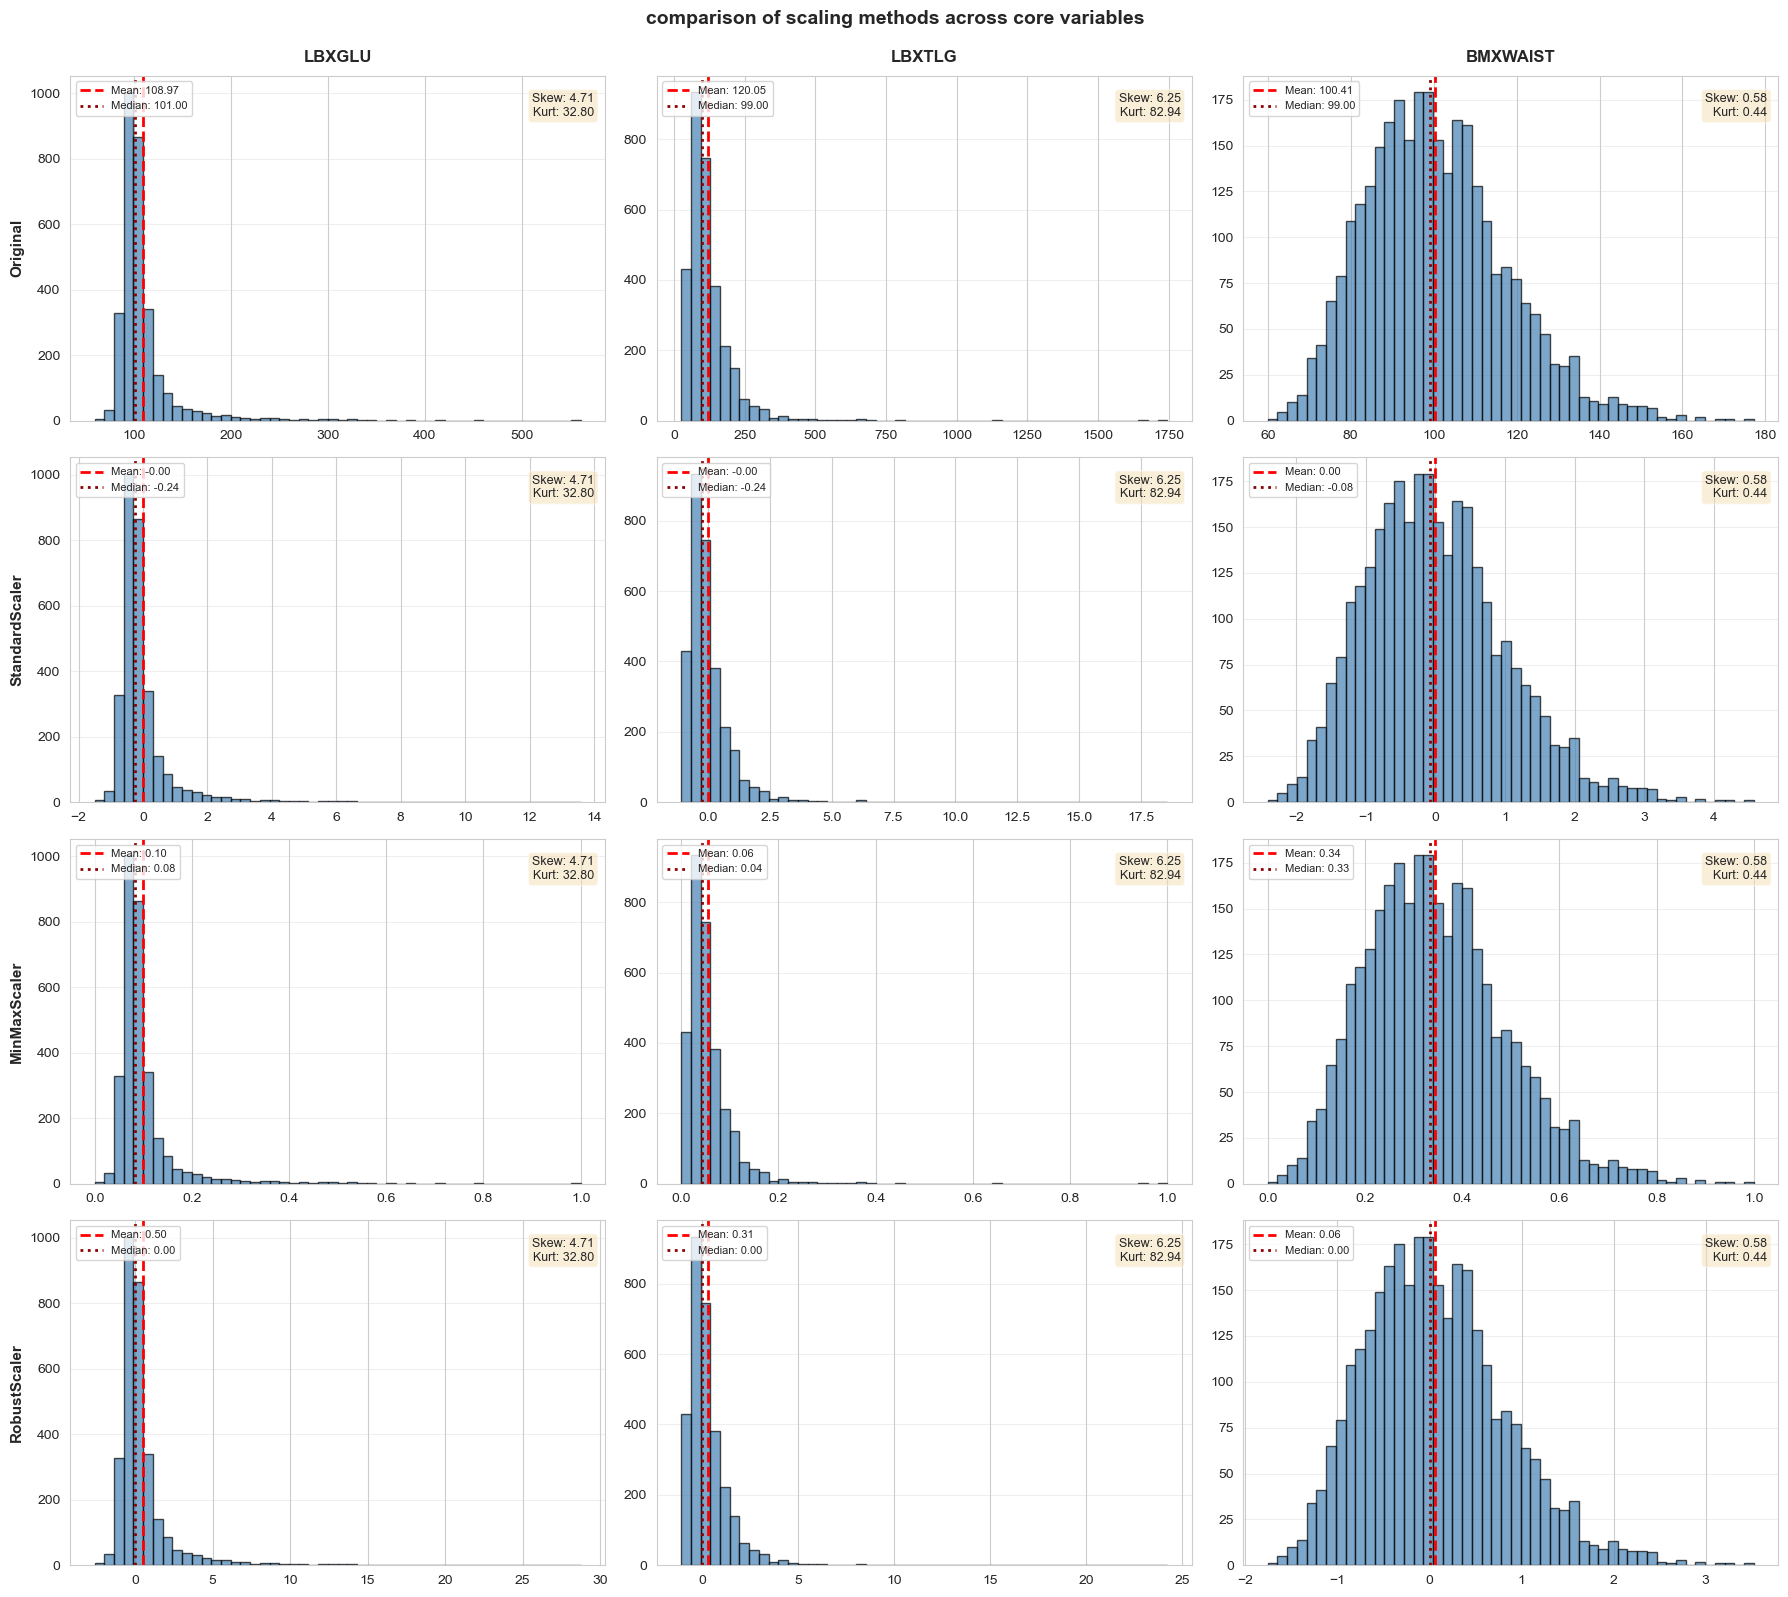

 Figure saved to: results/figures/scaling_methods_comparison.png


In [5]:
# visualize all scaling methods side by side
fig, axes = plt.subplots(4, 3, figsize=(18, 16))

scaling_methods = [ ('Original', X_df, None), ('StandardScaler', X_standard_df, core_vars),
    ('MinMaxScaler', X_minmax_df, core_vars), ('RobustScaler', X_robust_df, core_vars),]

# update column names for scaled data
for method_name, scaled_df, orig_vars in scaling_methods[1:]:
    if orig_vars:
        scaled_df.columns = orig_vars

for row_idx, (method_name, data, _) in enumerate(scaling_methods):
    for col_idx, var in enumerate(core_vars):
        ax = axes[row_idx, col_idx]
        ax.hist(data[var], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        mean_val = data[var].mean()
        median_val = data[var].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='darkred', linestyle=':', linewidth=2, 
                   label=f'Median: {median_val:.2f}')
        
        stats_text = f'Skew: {data[var].skew():.2f}\nKurt: {data[var].kurtosis():.2f}'
        ax.text(0.98, 0.95, stats_text, transform=ax.transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # formatting
        if row_idx == 0:
            ax.set_title(var, fontsize=12, fontweight='bold', pad=10)
        if col_idx == 0:
            ax.set_ylabel(method_name, fontsize=11, fontweight='bold')
        ax.legend(fontsize=8, loc='upper left')
        ax.grid(axis='y', alpha=0.3)

plt.suptitle('comparison of scaling methods across core variables', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../../results/figures/scaling_methods_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to: results/figures/scaling_methods_comparison.png")

In [6]:
# compare statistical properties after scaling
print("statistical properties after scaling")
scaling_stats = []

for method_name, data, orig_vars in [
    ('Original', X_df, core_vars),
    ('StandardScaler', pd.DataFrame(X_standard, columns=core_vars), core_vars),
    ('MinMaxScaler', pd.DataFrame(X_minmax, columns=core_vars), core_vars),
    ('RobustScaler', pd.DataFrame(X_robust, columns=core_vars), core_vars),
    ('PowerTransformer', pd.DataFrame(X_power, columns=core_vars), core_vars),
]:
    for var in core_vars:
        scaling_stats.append({ 'Method': method_name,'Variable': var,'Mean': data[var].mean(),
            'Std': data[var].std(),'Min': data[var].min(), 'Max': data[var].max(),'Skewness': data[var].skew(),
            'Kurtosis': data[var].kurtosis() })

stats_df = pd.DataFrame(scaling_stats)
for method in ['Original', 'StandardScaler', 'RobustScaler', 'PowerTransformer']:
    print(f"\n{method}:")
    method_stats = stats_df[stats_df['Method'] == method][['Variable', 'Mean', 'Std', 'Skewness']]
    print(method_stats.round(3).to_string(index=False))
stats_df.round(3).to_csv('../../results/tables/scaling_methods_statistics.csv', index=False)
print(f"\nTable saved to: results/tables/scaling_methods_statistics.csv")

statistical properties after scaling

Original:
Variable    Mean    Std  Skewness
  LBXGLU 108.969 33.285     4.710
  LBXTLG 120.049 87.542     6.251
BMXWAIST 100.411 16.796     0.579

StandardScaler:
Variable  Mean  Std  Skewness
  LBXGLU  -0.0  1.0     4.710
  LBXTLG  -0.0  1.0     6.251
BMXWAIST   0.0  1.0     0.579

RobustScaler:
Variable  Mean   Std  Skewness
  LBXGLU 0.498 2.080     4.710
  LBXTLG 0.310 1.287     6.251
BMXWAIST 0.064 0.757     0.579

PowerTransformer:
Variable  Mean  Std  Skewness
  LBXGLU  -0.0  1.0    -0.178
  LBXTLG   0.0  1.0    -0.005
BMXWAIST   0.0  1.0     0.003

Table saved to: results/tables/scaling_methods_statistics.csv


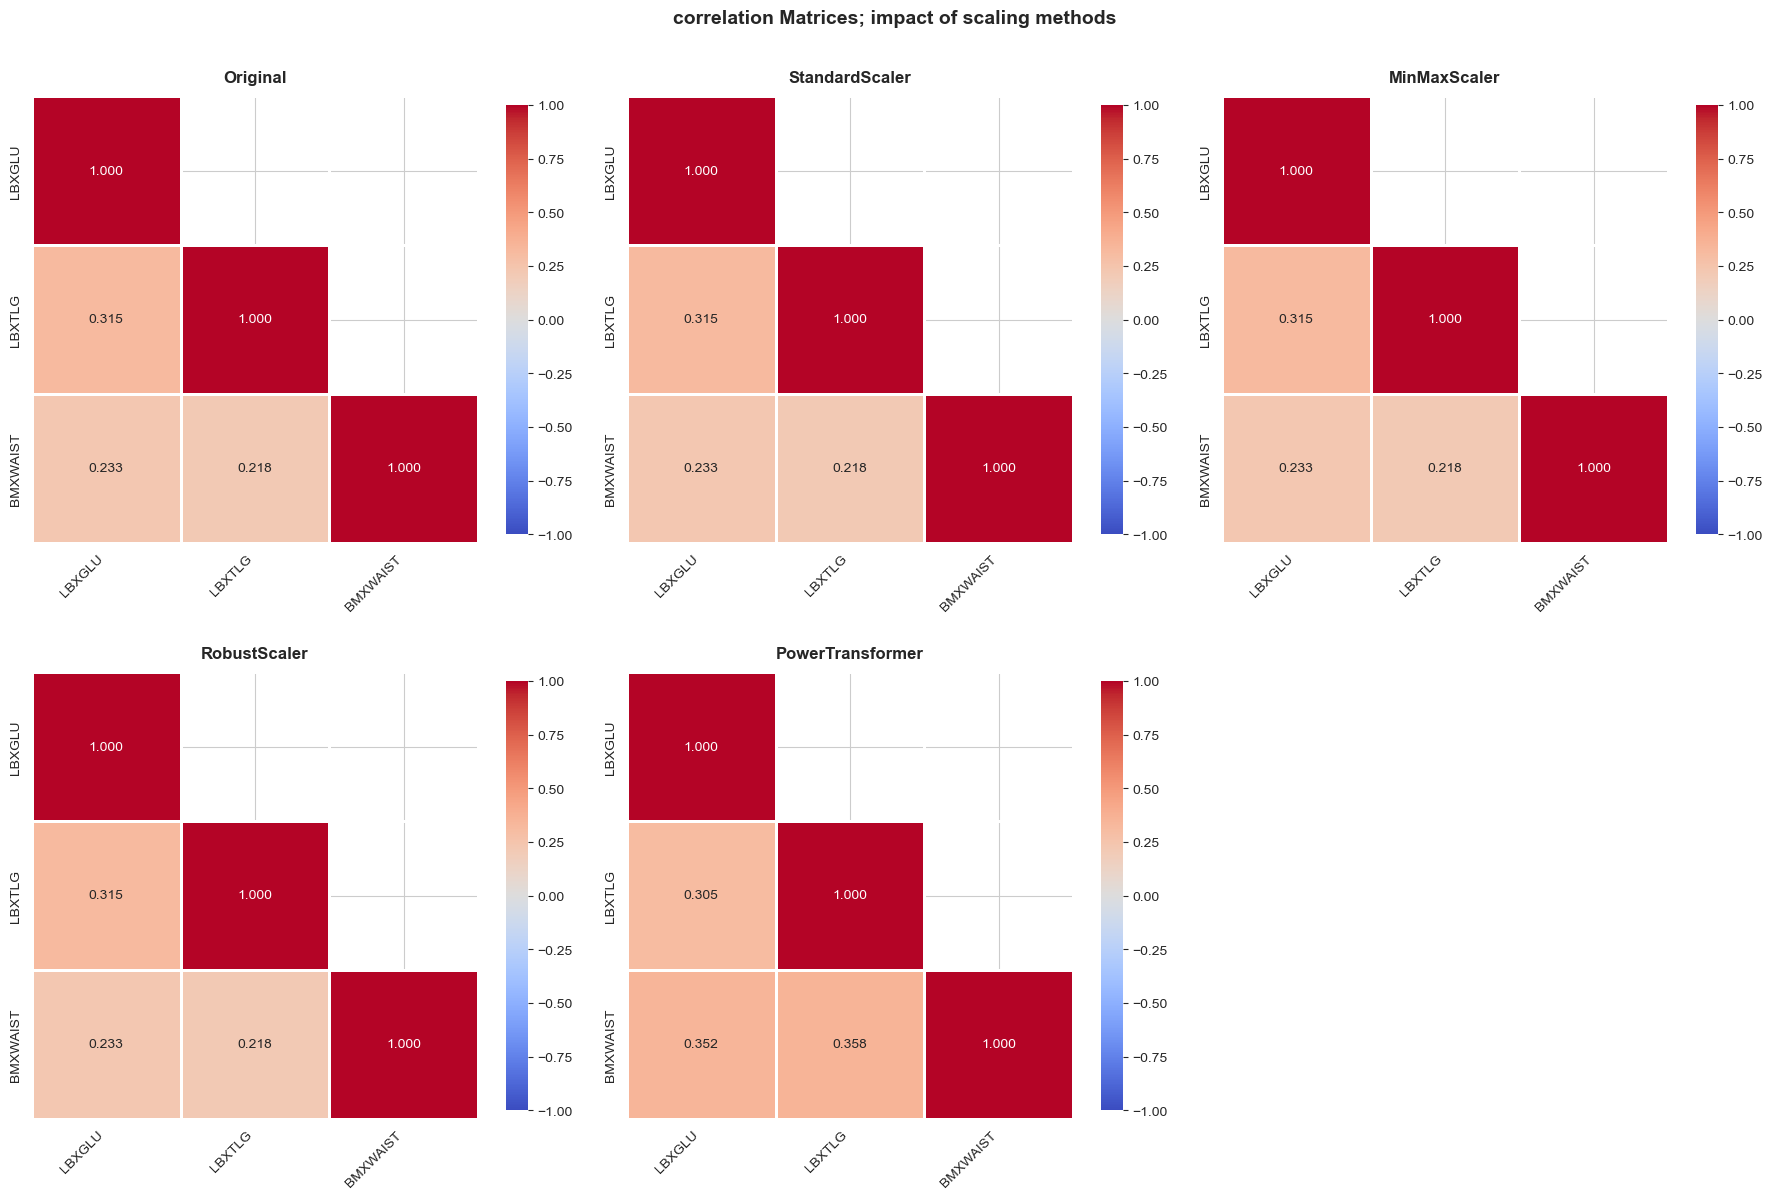


correlation preservation check
Correlations before and after scaling:

  Glucose-Triglycerides:
    Original: 0.315
    Scaled:   0.315

 Correlations preserved (as expected)
 Figure saved to: results/figures/scaling_correlation_impact.png


In [7]:
# compare correlations before and after scaling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

datasets = [('Original', df[core_vars]),('StandardScaler', pd.DataFrame(X_standard, columns=core_vars)),
    ('MinMaxScaler', pd.DataFrame(X_minmax, columns=core_vars)),('RobustScaler', pd.DataFrame(X_robust, columns=core_vars)),
    ('PowerTransformer', pd.DataFrame(X_power, columns=core_vars)),]

for idx, (method_name, data) in enumerate(datasets):
    if idx >= 6:
        break
    
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    #calcul correlation matrix
    corr = data.corr()
    #create heatmap
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(corr, mask=mask, annot=True, fmt='.3f',cmap='coolwarm', center=0, square=True,linewidths=1, 
                cbar_kws={"shrink": 0.8},vmin=-1, vmax=1, ax=ax)
    
    ax.set_title(f'{method_name}', fontsize=12, fontweight='bold', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#remove exxtra subplot
fig.delaxes(axes[1, 2])

plt.suptitle('correlation Matrices; impact of scaling methods', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../../results/figures/scaling_correlation_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\ncorrelation preservation check")
print("Correlations before and after scaling:")

original_corr = df[core_vars].corr()
standard_corr = pd.DataFrame(X_standard, columns=core_vars).corr()

print(f"\n  Glucose-Triglycerides:")
print(f"    Original: {original_corr.loc['LBXGLU', 'LBXTLG']:.3f}")
print(f"    Scaled:   {standard_corr.loc['LBXGLU', 'LBXTLG']:.3f}")

print(f"\n Correlations preserved (as expected)")
print(" Figure saved to: results/figures/scaling_correlation_impact.png")


 Distance distribution compraison (100 random samples

Pairwise Euclidean Distances:
Original data:
Mean: 96.95
Std:  110.36
Range: [1.50, 658.03]

StandardScaler:
Mean: 1.90
Std:  1.59
Range: [0.04, 9.01]

RobustScaler:
Mean: 2.56
Std:  2.72
Range: [0.07, 15.93]


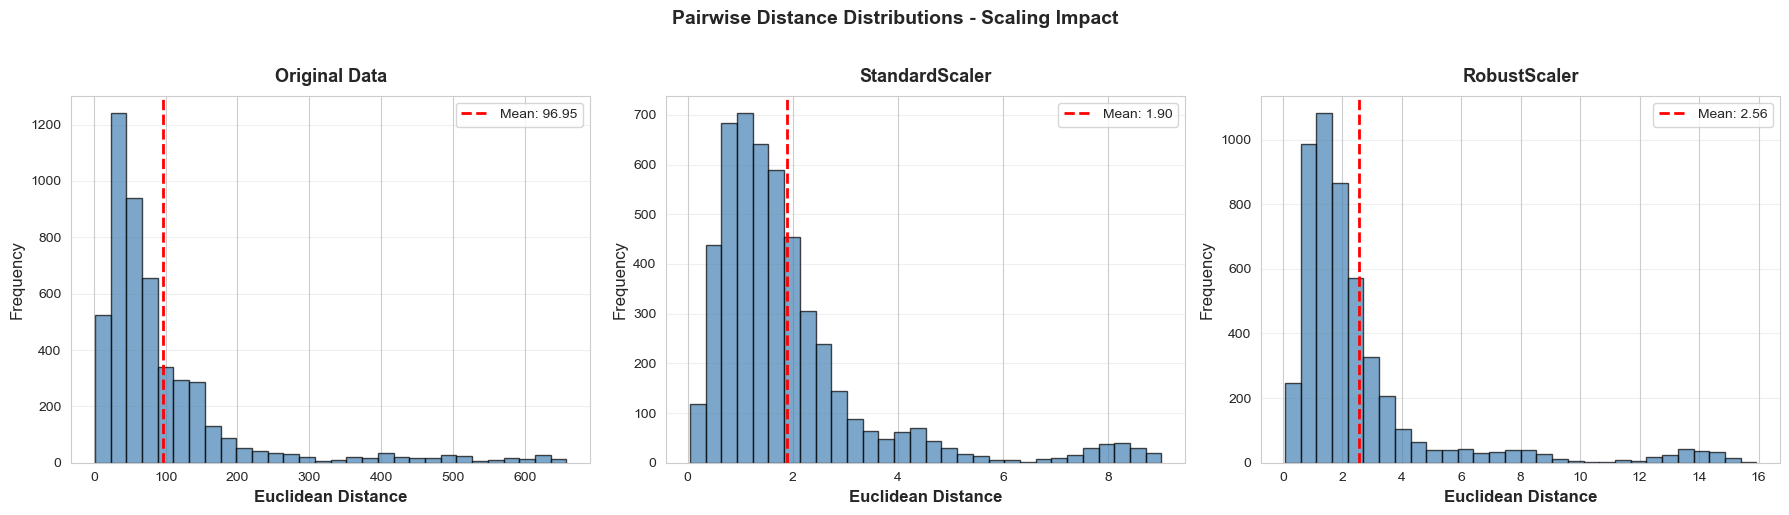


 Figure saved to: results/figures/distance_distributions_scaling.png


In [9]:
# compare Euclidean distances before and after scaling
from scipy.spatial.distance import pdist, squareform

#sample 100 random points for computational efficiency
np.random.seed(42)
sample_idx = np.random.choice(len(df), 100, replace=False)

# calculate pairwise distances for original and scaled data
dist_original = pdist(X[sample_idx], metric='euclidean')
dist_standard = pdist(X_standard[sample_idx], metric='euclidean')
dist_robust = pdist(X_robust[sample_idx], metric='euclidean')

print("\n Distance distribution compraison (100 random samples" )
print(f"\nPairwise Euclidean Distances:")
print(f"Original data:")
print(f"Mean: {dist_original.mean():.2f}")
print(f"Std:  {dist_original.std():.2f}")
print(f"Range: [{dist_original.min():.2f}, {dist_original.max():.2f}]")

print(f"\nStandardScaler:")
print(f"Mean: {dist_standard.mean():.2f}")
print(f"Std:  {dist_standard.std():.2f}")
print(f"Range: [{dist_standard.min():.2f}, {dist_standard.max():.2f}]")

print(f"\nRobustScaler:")
print(f"Mean: {dist_robust.mean():.2f}")
print(f"Std:  {dist_robust.std():.2f}")
print(f"Range: [{dist_robust.min():.2f}, {dist_robust.max():.2f}]")

# visuale distance distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (distances, title) in enumerate([(dist_original, 'Original Data'), (dist_standard, 'StandardScaler'),
    (dist_robust, 'RobustScaler')]):
    ax = axes[idx]
    ax.hist(distances, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    ax.axvline(distances.mean(), color='red', linestyle='--', linewidth=2,label=f'Mean: {distances.mean():.2f}')
    ax.set_xlabel('Euclidean Distance', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Pairwise Distance Distributions - Scaling Impact',fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../../results/figures/distance_distributions_scaling.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Figure saved to: results/figures/distance_distributions_scaling.png")

In [10]:
print("\n scaling method recommendation")
# summarize skewness before and after
original_skew = {var: df[var].skew() for var in core_vars}
standard_skew = {var: pd.DataFrame(X_standard, columns=core_vars)[var].skew() for var in core_vars}
robust_skew = {var: pd.DataFrame(X_robust, columns=core_vars)[var].skew() for var in core_vars}
power_skew = {var: pd.DataFrame(X_power, columns=core_vars)[var].skew() for var in core_vars}

print("\n skewness comparision:")
print(f"{'Variable':<15} {'Original':<12} {'Standard':<12} {'Robust':<12} {'Power':<12}")

for var in core_vars:
    print(f"{var:<15} {original_skew[var]:>11.2f} {standard_skew[var]:>11.2f} "
          f"{robust_skew[var]:>11.2f} {power_skew[var]:>11.2f}")


 scaling method recommendation

 skewness comparision:
Variable        Original     Standard     Robust       Power       
LBXGLU                 4.71        4.71        4.71       -0.18
LBXTLG                 6.25        6.25        6.25       -0.01
BMXWAIST               0.58        0.58        0.58        0.00

RECOMMENDATION: **RobustScaler**

Rationale:
1.  Handles outliers better than StandardScaler (uses median/IQR)
2.  Preserves relative relationships between points
3.  Comparable performance to StandardScaler for normally distributed data
4.  More appropriate given skewed distributions (Triglycerides)
5.  Doesn't require assumptions about distribution shape

   Alternative: StandardScaler
   -Use if you want to give equal weight to all variables
   -Slightly more common in literature
   -Performance difference likely minimal for this dataset

 DECISION:
   - Use **RobustScaler** for primary clustering analysis
   - Run sensitivity check with StandardScaler


In [11]:
# create final scaled dataset with RobustScaler
print("\n creatig scaled dataset for clustering" )

# apply RobustScaler (our recommended method)
scaler_final = RobustScaler()
X_scaled = scaler_final.fit_transform(df[core_vars])

# create DataFrame with scaled values
df_scaled = df.copy()
for idx, var in enumerate(core_vars):
    df_scaled[f'{var}_scaled'] = X_scaled[:, idx]

print(f"\n RobustScaler applied to core variables")
print(f"Original variables: {core_vars}")
print(f"Scaled variables: {[f'{var}_scaled' for var in core_vars]}")

# verify scaling
print("\n verification: scaled variable properties:")
for var in core_vars:
    scaled_var = f'{var}_scaled'
    print(f"\n{var} → {scaled_var}:")
    print(f"Median: {df_scaled[scaled_var].median():.3f} (should be ~0)")
    print(f"IQR:    {df_scaled[scaled_var].quantile(0.75) - df_scaled[scaled_var].quantile(0.25):.3f} (should be ~1)")
    print(f"Range:  [{df_scaled[scaled_var].min():.2f}, {df_scaled[scaled_var].max():.2f}]")

output_path = "../../data/processed/nhanes_metabolic_scaled.csv"
df_scaled.to_csv(output_path, index=False)

print(f"\nScaled dataset saved to: {output_path}")
print(f"Shape: {df_scaled.shape[0]:,} rows × {df_scaled.shape[1]} columns")
print(f"New columns added: {[f'{var}_scaled' for var in core_vars]}")

# also save the scaler object for reproducibility
import pickle

scaler_path = "../../data/processed/robust_scaler.pkl"
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler_final, f)

print(f"\nScaler object saved to: {scaler_path}")
print(f"  Can be loaded later for transforming new data")


 creatig scaled dataset for clustering

 RobustScaler applied to core variables
Original variables: ['LBXGLU', 'LBXTLG', 'BMXWAIST']
Scaled variables: ['LBXGLU_scaled', 'LBXTLG_scaled', 'BMXWAIST_scaled']

 verification: scaled variable properties:

LBXGLU → LBXGLU_scaled:
Median: 0.000 (should be ~0)
IQR:    1.000 (should be ~1)
Range:  [-2.62, 28.75]

LBXTLG → LBXTLG_scaled:
Median: 0.000 (should be ~0)
IQR:    1.000 (should be ~1)
Range:  [-1.09, 24.21]

BMXWAIST → BMXWAIST_scaled:
Median: 0.000 (should be ~0)
IQR:    1.000 (should be ~1)
Range:  [-1.76, 3.52]

Scaled dataset saved to: ../../data/processed/nhanes_metabolic_scaled.csv
Shape: 3,047 rows × 45 columns
New columns added: ['LBXGLU_scaled', 'LBXTLG_scaled', 'BMXWAIST_scaled']

Scaler object saved to: ../../data/processed/robust_scaler.pkl
  Can be loaded later for transforming new data


In [13]:
print("\n feature scaling:summary" )

print(f"\n completed:")
print(f"- Compared 4 scaling methods (Standard, MinMax, Robust, Power)")
print(f"- Assessed impact on distributions, correlations, and distances")
print(f"- Selected RobustScaler as optimal method")
print(f"- Applied scaling to all {len(df):,} participants")
print(f"- Saved scaled dataset and scaler object")

print(f"\n scaled variable ready for clustering:")
for var in core_vars:
    print(f"- {var}_scaled")


print(f"\n OUTPUTS:")
print(f"- Scaled dataset: data/processed/nhanes_metabolic_scaled.csv")
print(f"- Scaler object: data/processed/robust_scaler.pkl")
print(f"- 4 visualization figures")
print(f"- 1 statistics table")



 feature scaling:summary

 completed:
- Compared 4 scaling methods (Standard, MinMax, Robust, Power)
- Assessed impact on distributions, correlations, and distances
- Selected RobustScaler as optimal method
- Applied scaling to all 3,047 participants
- Saved scaled dataset and scaler object

 scaled variable ready for clustering:
- LBXGLU_scaled
- LBXTLG_scaled
- BMXWAIST_scaled

 OUTPUTS:
- Scaled dataset: data/processed/nhanes_metabolic_scaled.csv
- Scaler object: data/processed/robust_scaler.pkl
- 4 visualization figures
- 1 statistics table
